## Checklist


|**Section**|**Completion**|
|-|-|
|**Section 1**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|**Section 2**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|**Section 3**| Multi-Armed Bandit (MAB) |

# Section 1 - Funnel Analysis


1. Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating a DataFrame
funnel=pd.read_excel("AssignmentData.xlsx" , parse_dates=True)

In [3]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1197 non-null   object 
 1   Quarter                1197 non-null   object 
 2   Department             1197 non-null   object 
 3   Targeted Productivity  1197 non-null   float64
 4   Overtime               1197 non-null   int64  
 5   No. of Workers         1197 non-null   float64
 6   Actual Productivity    1167 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 65.6+ KB


In [4]:
# object to Datetime format
funnel['Date']=pd.to_datetime(funnel['Date'])

In [5]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01,Q1,Sewing,0.80,1920,56.0,NaN
...,...,...,...,...,...,...,...
1192,2015-11-03,Q2,Finishing,0.75,960,8.0,0.628333
1193,2015-11-03,Q2,Finishing,0.70,960,8.0,NaN
1194,2015-11-03,Q2,Finishing,0.65,960,8.0,0.625625
1195,2015-11-03,Q2,Finishing,0.75,1800,15.0,0.505889


In [6]:
# unique values in the column Quarter
funnel['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], dtype=object)

In [7]:
# unique values in the column Department
funnel['Department'].unique()

array(['Sewing', 'Finishing'], dtype=object)

In [8]:
# actual productivity has 30 NaN values
funnel.isnull().sum()

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64

In [9]:
funnel.shape

(1197, 7)

In [10]:
# finding mean of the column
mean=funnel['Actual Productivity'].mean()

In [11]:
# replacing NaN with mean
funnel['Actual Productivity'].fillna(mean , inplace=True)

In [12]:
funnel.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [13]:
# droping duplicate values
funnel=funnel.drop_duplicates()

2. Create a new column called `Target Achieved` (categorical as "**Yes**" if Actual Productivity is greater than Targeted Productivity, and "**No**" otherwise). Then, Complete the below given tasks using the columns : Department, Targeted Productivity, Overtime, Number of Workers, Quarter, and Start and End Dates of the observations in the dataset. And give a summary of  the results. <br><br>

In [14]:
funnel['Actual - Targeted']=funnel['Actual Productivity'] - funnel['Targeted Productivity']

<ipython-input-14-ba84c25eb1de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel['Actual - Targeted']=funnel['Actual Productivity'] - funnel['Targeted Productivity']


In [15]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Actual - Targeted
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,0.140725
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,0.136500
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,0.000570
4,2015-01-01,Q1,Sewing,0.80,1920,56.0,0.734882,-0.065118
5,2015-01-01,Q1,Sewing,0.80,6720,56.0,0.800125,0.000125
...,...,...,...,...,...,...,...,...
1192,2015-11-03,Q2,Finishing,0.75,960,8.0,0.628333,-0.121667
1193,2015-11-03,Q2,Finishing,0.70,960,8.0,0.734882,0.034882
1194,2015-11-03,Q2,Finishing,0.65,960,8.0,0.625625,-0.024375
1195,2015-11-03,Q2,Finishing,0.75,1800,15.0,0.505889,-0.244111


In [16]:
def func(num):
  if num>0:
    return "Yes"
  else :
    return "No"

In [17]:
# If actual productivity is greater than targeted productivity then "Yes" else "No"
funnel['Actual - Targeted']=funnel['Actual - Targeted'].apply(func)

<ipython-input-17-7b9d5a604ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel['Actual - Targeted']=funnel['Actual - Targeted'].apply(func)


In [18]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Actual - Targeted
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01,Q1,Sewing,0.80,1920,56.0,0.734882,No
5,2015-01-01,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...,...
1192,2015-11-03,Q2,Finishing,0.75,960,8.0,0.628333,No
1193,2015-11-03,Q2,Finishing,0.70,960,8.0,0.734882,Yes
1194,2015-11-03,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03,Q2,Finishing,0.75,1800,15.0,0.505889,No


In [19]:
funnel.rename(columns={"Actual - Targeted":"Target Achieved"} , inplace=True)

<ipython-input-19-5729ffa7e74d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel.rename(columns={"Actual - Targeted":"Target Achieved"} , inplace=True)


In [20]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01,Q1,Sewing,0.80,1920,56.0,0.734882,No
5,2015-01-01,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...,...
1192,2015-11-03,Q2,Finishing,0.75,960,8.0,0.628333,No
1193,2015-11-03,Q2,Finishing,0.70,960,8.0,0.734882,Yes
1194,2015-11-03,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03,Q2,Finishing,0.75,1800,15.0,0.505889,No


a) Create grouped bar graphs to show the level of Target achieved( 'yes' and 'No') for the given date range, at a quarterly time interval for both categories. The graph should have appropriate labels, titles and other factors which would make it readable.Also provide a brief interpretation of the graph.
    <br><br>

Only 2 days are there where no target achieved were high  

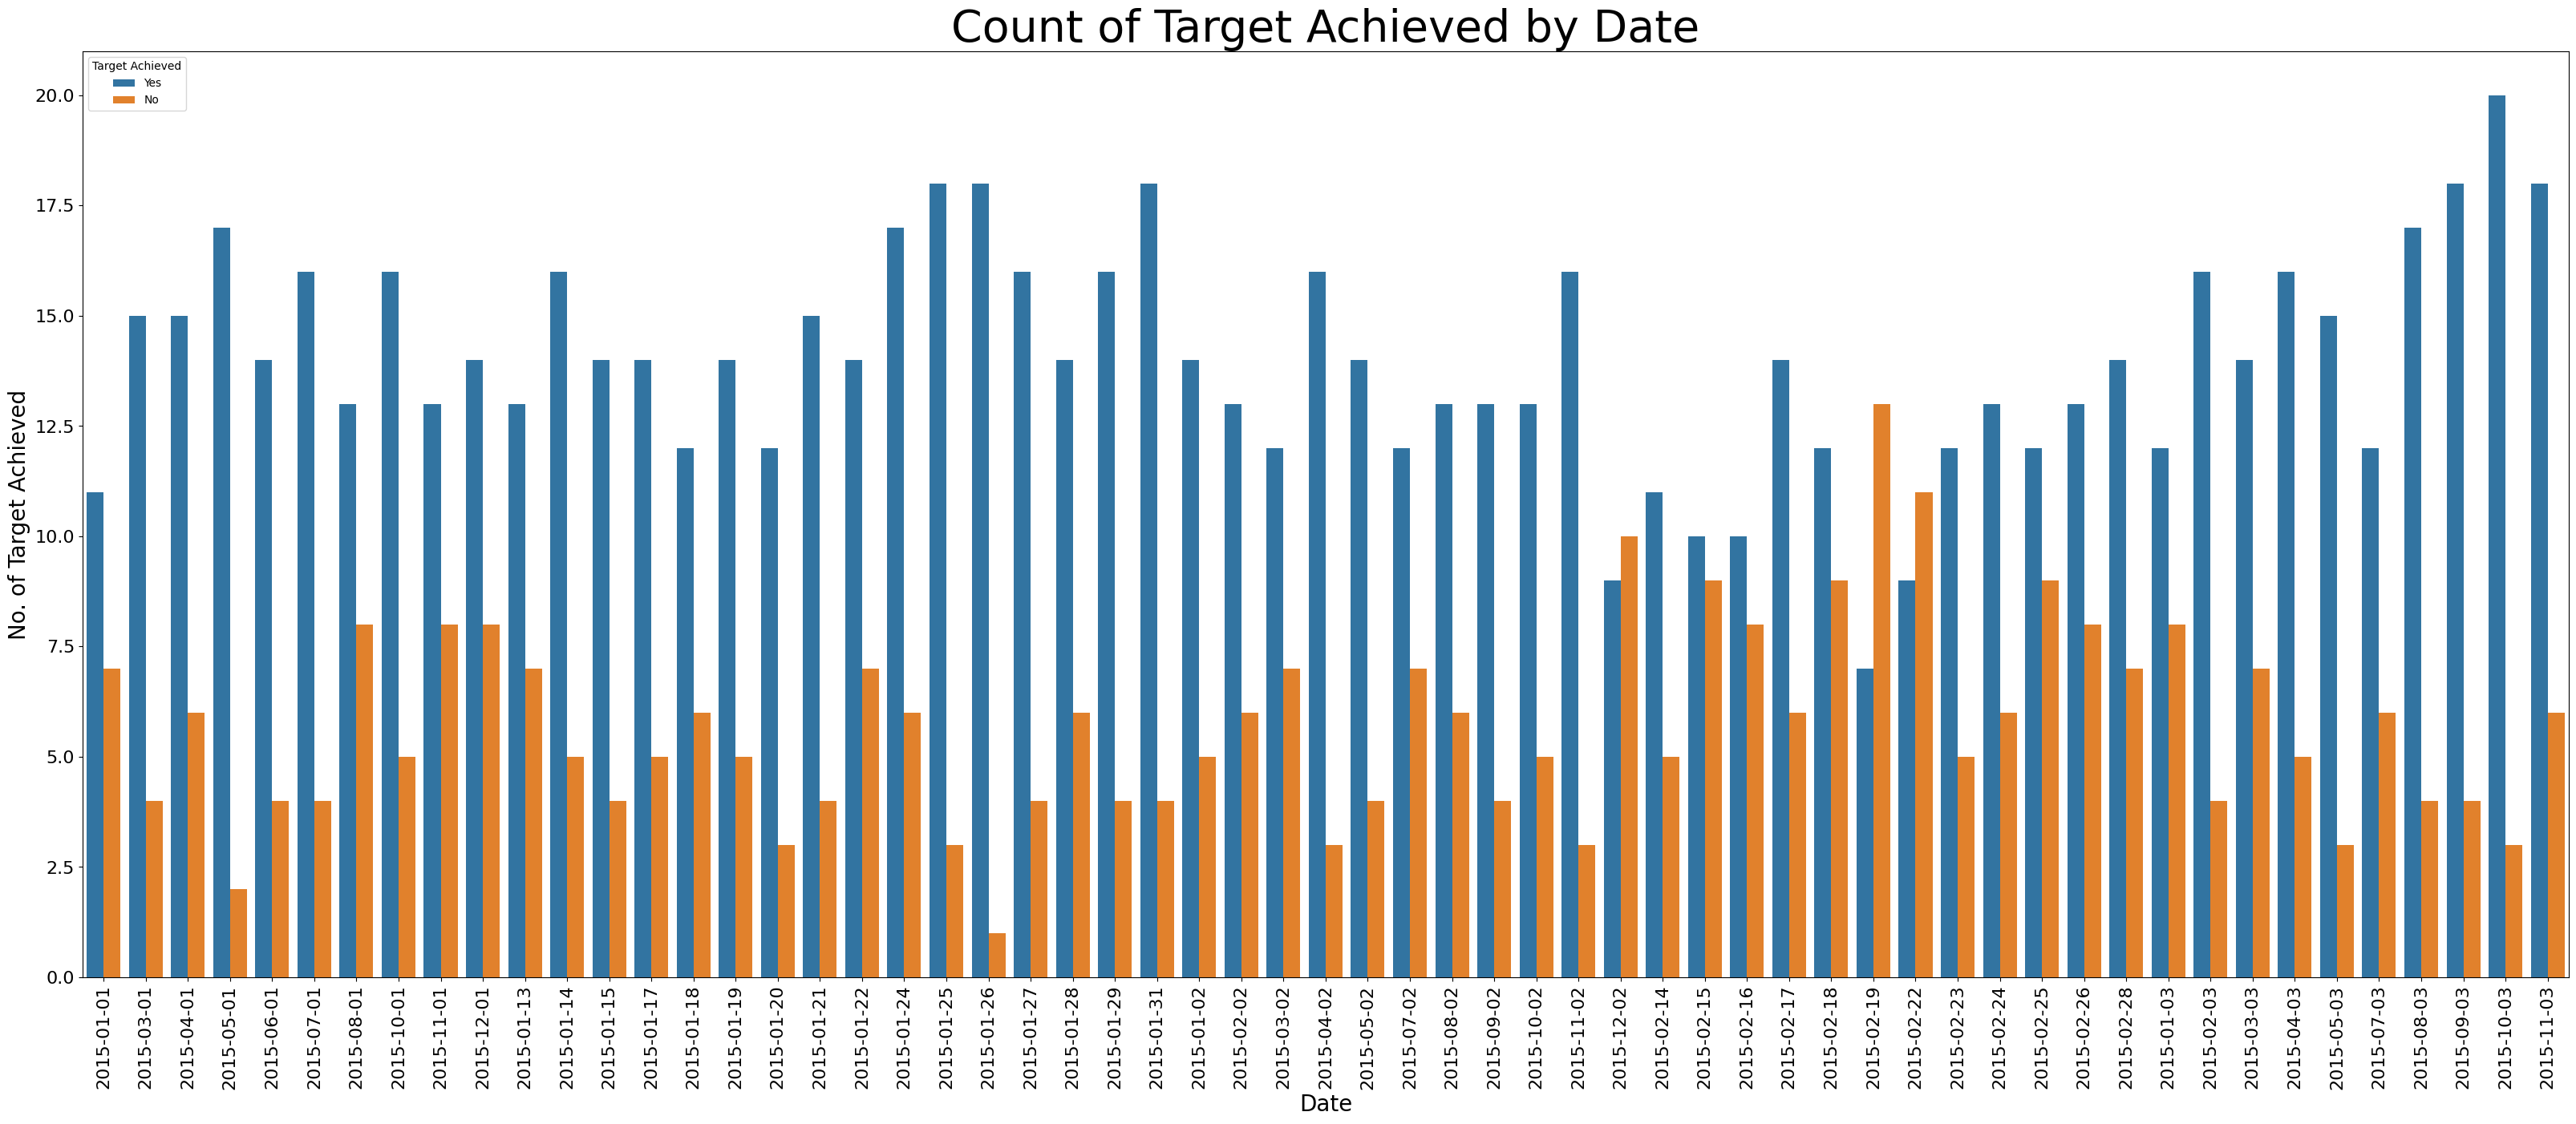

In [21]:
plt.figure(figsize=(40,15))
sns.countplot(x="Date"  ,data=funnel , orient="H" , hue="Target Achieved" )
plt.title("Count of Target Achieved by Date", fontsize=40)
plt.xlabel("Date" ,  fontsize=20)
plt.ylabel("No. of Target Achieved" , fontsize=20)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

Most Number of target Achieved in Quarter 1 and also not achieved target is Quarter 1 only , You can say opportunities are high in Quarter 1

Tareget Achieved in percentage per quarter:
1.     Quarter 1 =250/350=71 %
2.     Quarter 2 =225/350 =64 %
3.      Quarter 3 = 125/200 =62%
4.    Quarter 4 =150/225 =66%
5.     Quarter 5 =20/35=57%



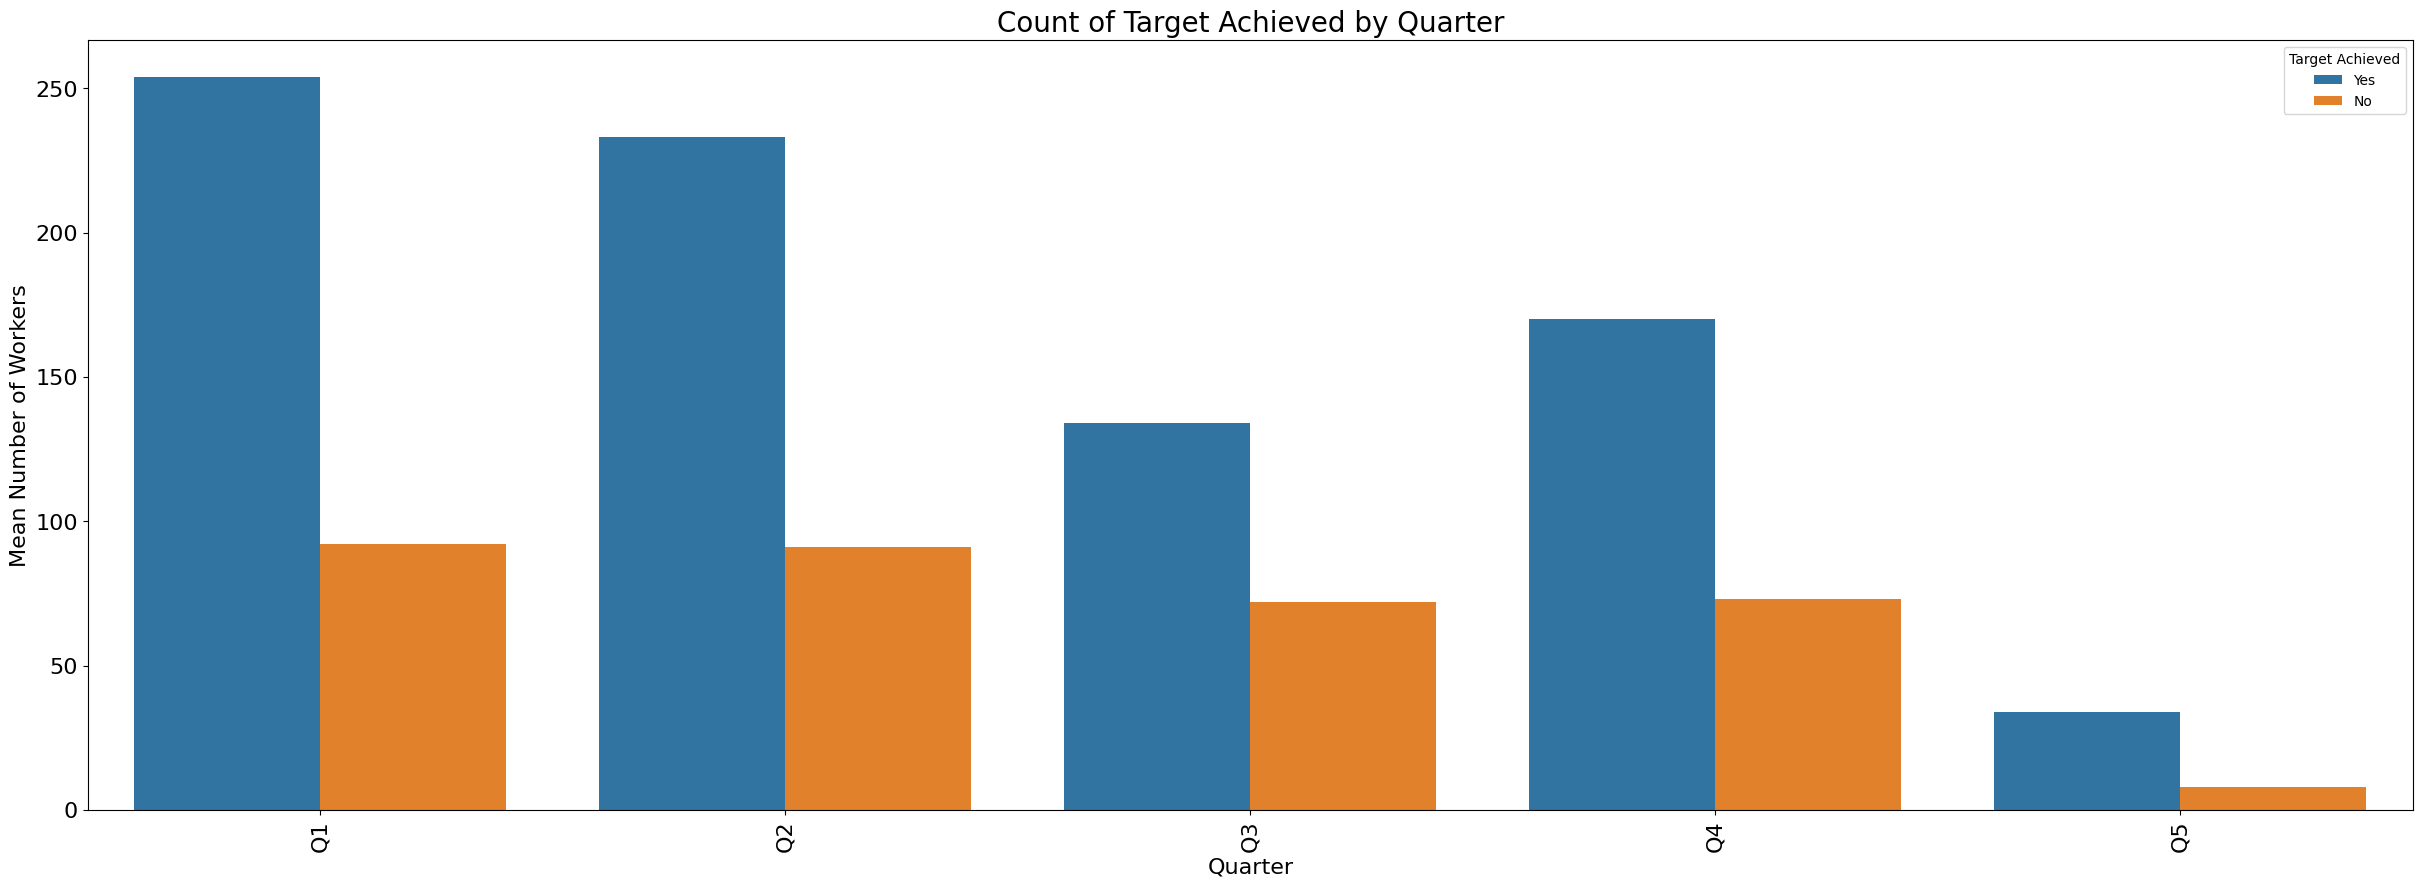

In [22]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Quarter", data=funnel, orient="H", hue="Target Achieved")
plt.title("Count of Target Achieved by Quarter", fontsize=20)
plt.xlabel("Quarter", fontsize=16)
plt.ylabel("Mean Number of Workers", fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

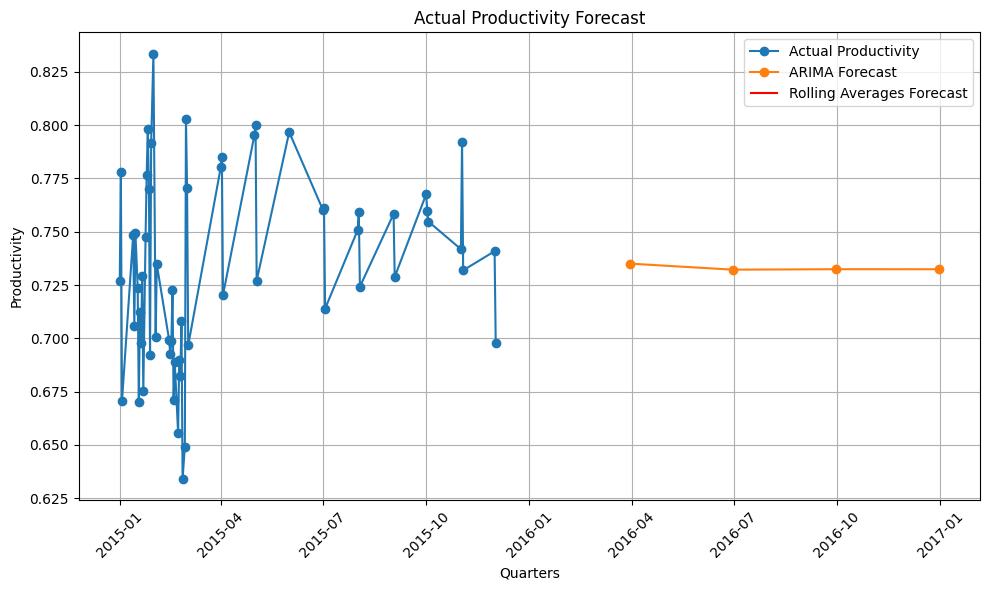

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Provided data for Actual Productivity

df=funnel

# Generate quarters for the provided data
quarters = pd.date_range(start=df['Date'].iloc[-1], periods=5, freq='Q')

# ARIMA model
def arima_forecast(data, periods):
    model = ARIMA(data, order=(1,1,1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=periods)
    return forecast

# Rolling Averages
def rolling_average(data, window):
    return data.rolling(window=window).mean().iloc[-1]

# Extracting the time series data
time_series = df.groupby('Date')['Actual Productivity'].mean()

# Forecast using ARIMA
arima_forecast_values = arima_forecast(time_series, 4)

# Forecast using Rolling Averages
rolling_avg_forecast_values = rolling_average(time_series, 4)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Actual Productivity
plt.plot(time_series.index, time_series.values, label='Actual Productivity', marker='o')

# Plot ARIMA forecast
arima_forecast_quarters = pd.date_range(start=time_series.index[-1], periods=5, freq='Q')[1:]
plt.plot(arima_forecast_quarters, arima_forecast_values, label='ARIMA Forecast', marker='o')

# Plot Rolling Averages forecast
rolling_avg_quarters = pd.date_range(start=time_series.index[-1], periods=2, freq='Q')[1:]
rolling_avg_values = [rolling_avg_forecast_values]*len(rolling_avg_quarters)
plt.hlines(rolling_avg_forecast_values, xmin=rolling_avg_quarters[0], xmax=rolling_avg_quarters[-1],
           label='Rolling Averages Forecast', colors='r')

plt.title('Actual Productivity Forecast')
plt.xlabel('Quarters')
plt.ylabel('Productivity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c) Ceate a summary of comparison with the evaluation criteria and their values for each model. You can add more evaluation criteria, which will contribute to your increased chances of selection, but the following are a must have: <br>
    (i) Mean Absolute Percentage Error (MAPE)<br>
    (ii) Mean Squared Error (MSE)

In [54]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Actual values for the next four quarters
actual_values = [0.991389, 0.931646, 0.915229, 0.879714]

# ARIMA forecasted values
arima_mape = mean_absolute_percentage_error(actual_values, arima_forecast_values)
arima_mse = mean_squared_error(actual_values, arima_forecast_values)

# Rolling Averages forecasted values
rolling_avg_mape = mean_absolute_percentage_error(actual_values, [rolling_avg_forecast_values]*len(actual_values))
rolling_avg_mse = mean_squared_error(actual_values, [rolling_avg_forecast_values]*len(actual_values))

# Displaying comparison summary
print("Comparison Summary:")
print("-------------------")
print("Model\t\t\tMAPE\t\tMSE")
print("---------------------------------------------------")
print(f"ARIMA\t\t\t{arima_mape:.4f}\t\t{arima_mse:.4f}")
print(f"Rolling Averages\t{rolling_avg_mape:.4f}\t\t{rolling_avg_mse:.4f}")


Comparison Summary:
-------------------
Model			MAPE		MSE
---------------------------------------------------
ARIMA			0.2100		0.0402
Rolling Averages	0.2017		0.0373


# Section -2

In all the Quarter productivity is almost same ,slitly higher in case of Quarter 5

Finishing Department productivity is higher than Sewing department in all the quarters

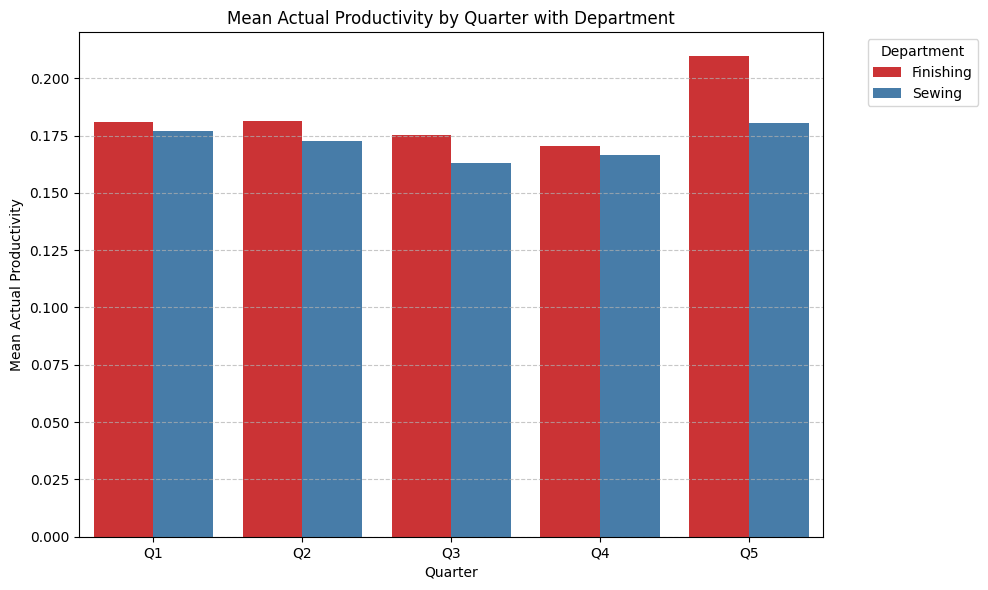

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(funnel)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Quarter and calculate mean of Actual Productivity
quarterly_mean = df.groupby(['Quarter', 'Department'])['Actual Productivity'].mean().reset_index()
quarterly_mean['Actual Productivity']=quarterly_mean['Actual Productivity']/4.2

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=quarterly_mean, x='Quarter', y='Actual Productivity', hue='Department', palette='Set1')
plt.title('Mean Actual Productivity by Quarter with Department')
plt.xlabel('Quarter')
plt.ylabel('Mean Actual Productivity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



1.Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for each device type creating separate trendlines for each device in order to find which device performed best in terms of total number of clicks.

In [26]:
abtest=pd.read_excel("AssignmentData.xlsx" , sheet_name="ABTest")

In [27]:
abtest.head(50)

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control
5,2023-05-18,Laptop,fyttlyf/personal/product/digital-wallet-send-r...,289,875,Control
6,2023-05-18,Mobile,fyttlyf/business/product/business///,139,270,Experiment
7,2023-05-18,Other,fyttlyf/both/security/security-learn-about-fak...,7,74,Control
8,2023-05-18,Mobile,fyttlyf///extras-credit-card-benefits///,8,36,Control
9,2023-05-18,Laptop,fyttlyf/business/product/business-pos-system/p...,9,131,Control


In [28]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      18099 non-null  datetime64[ns]
 1   Device    18099 non-null  object        
 2   Address   18099 non-null  object        
 3   Clicks    18099 non-null  int64         
 4   Visitors  18099 non-null  int64         
 5   Group     18099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 848.5+ KB


Most of the Clicks had done from the mobile and least with Tablet

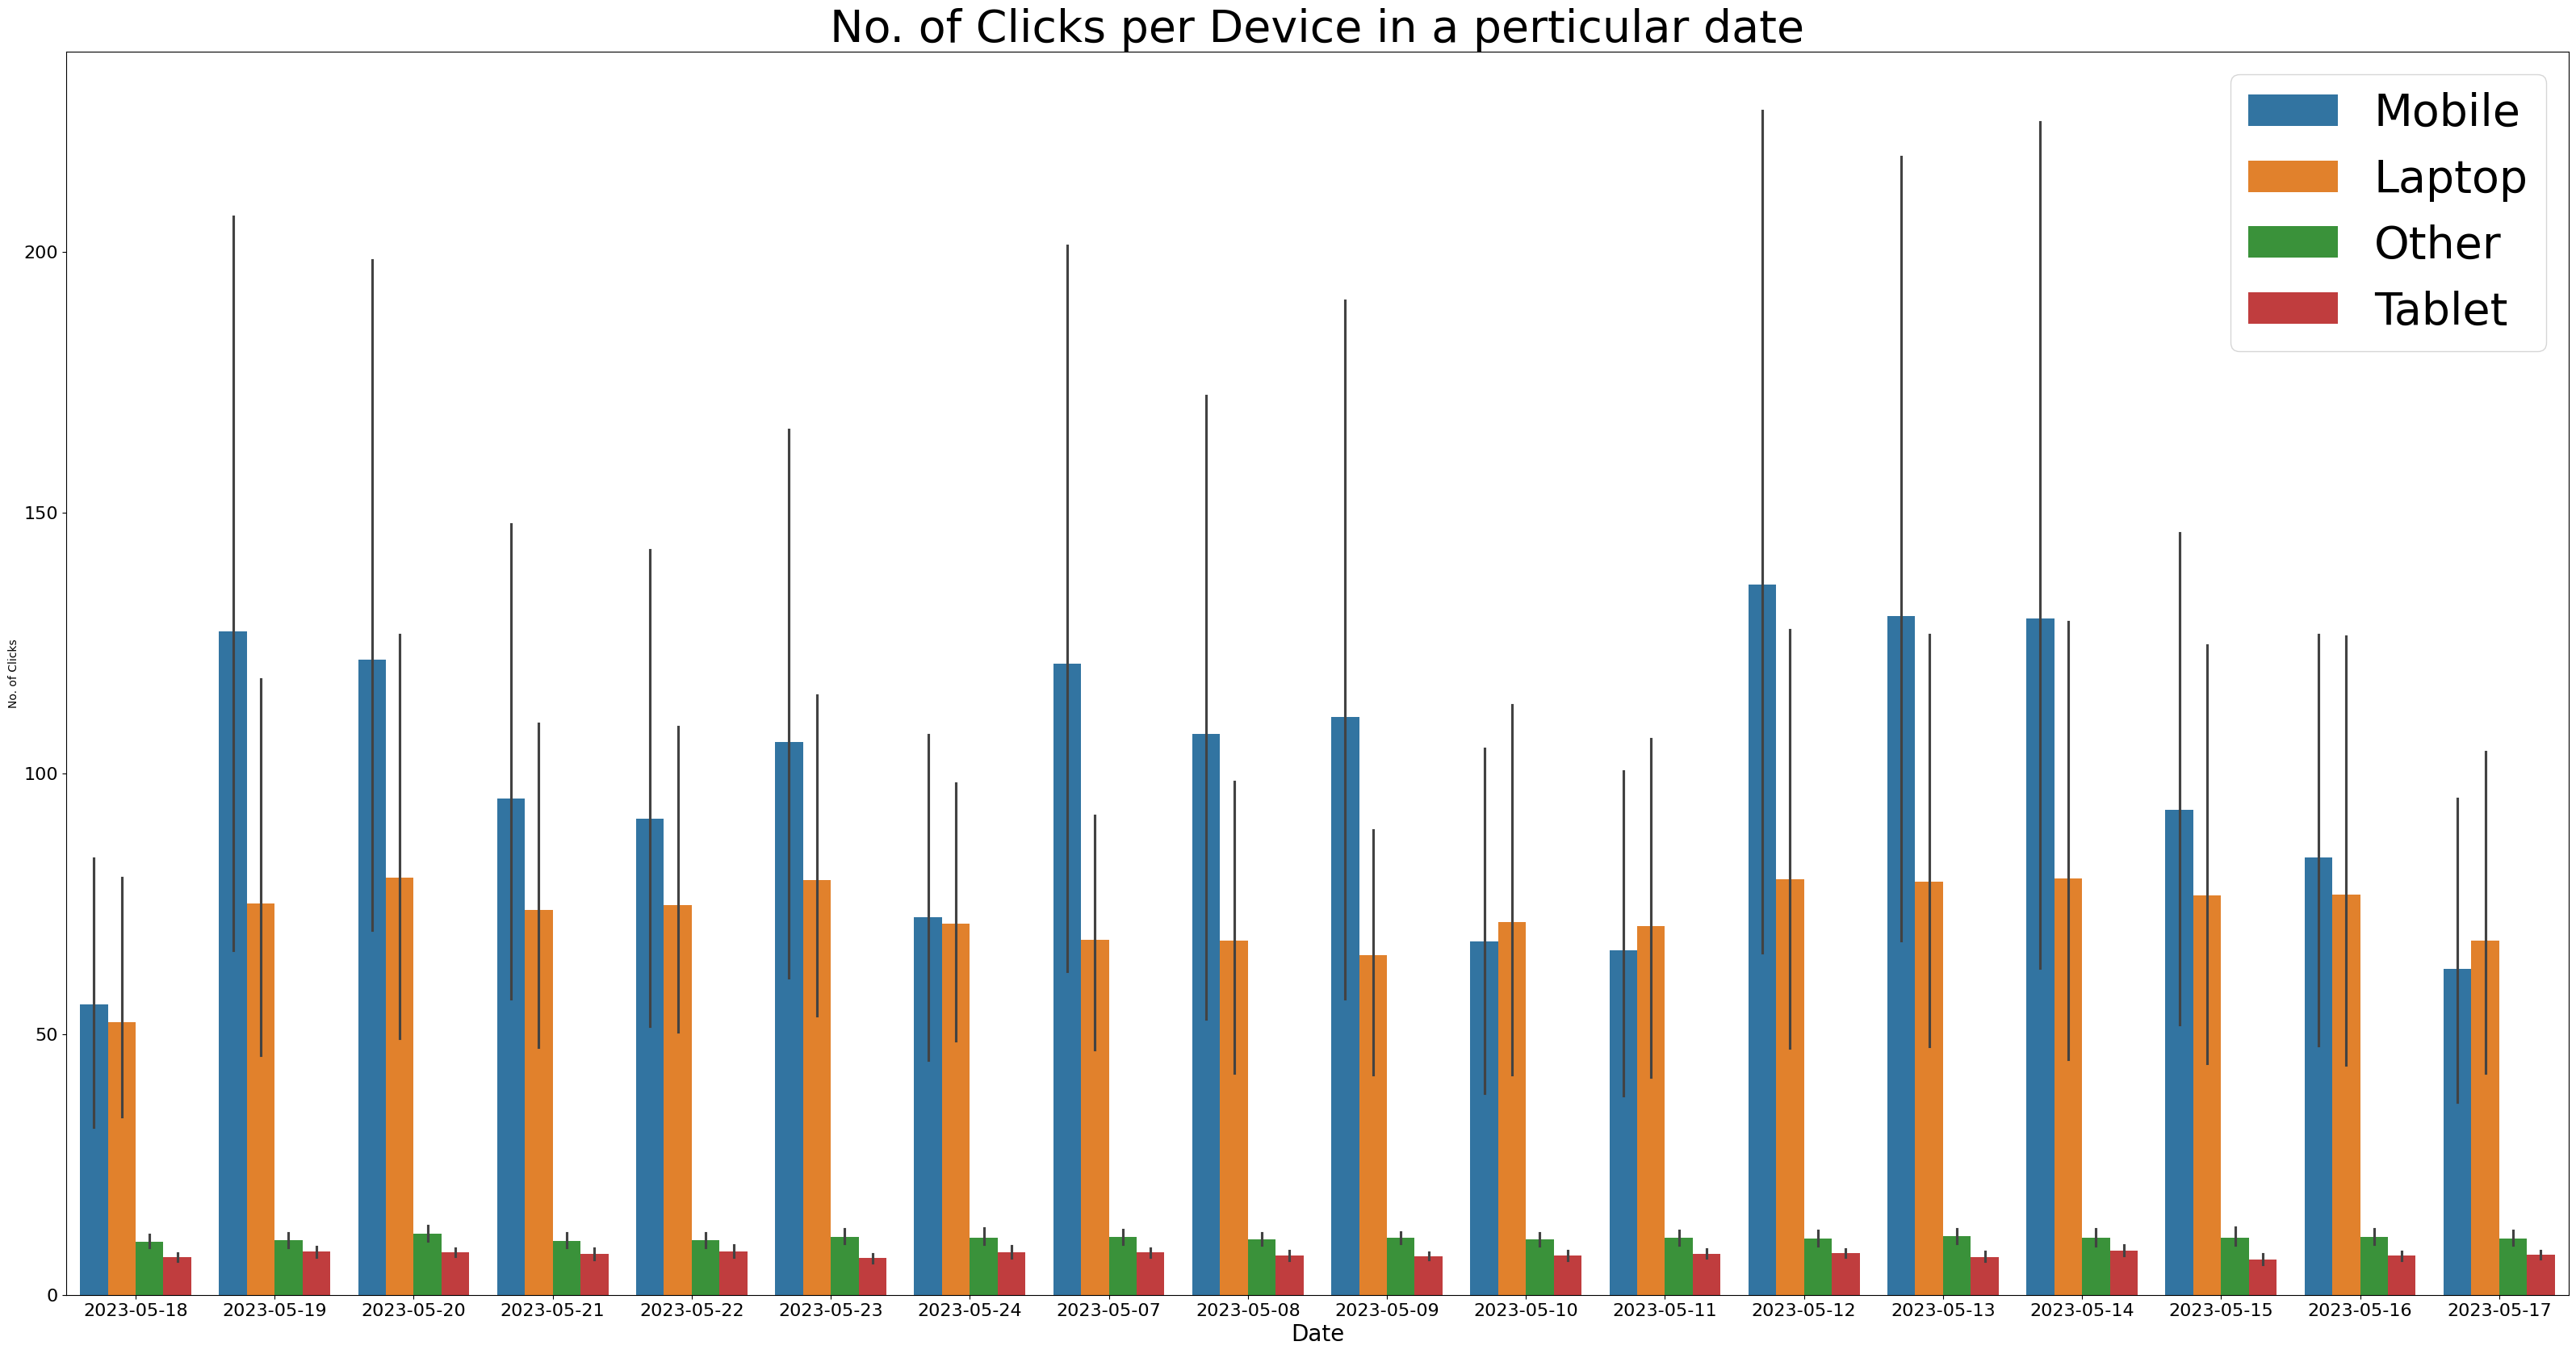

In [29]:
plt.figure(figsize=(40 , 20))
sns.barplot(x="Date" , y="Clicks" , data=abtest , hue="Device")
plt.title("No. of Clicks per Device in a perticular date", fontsize=40)
plt.xlabel("Date" ,  fontsize=20)
plt.ylabel("No. of Clicks")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.legend(fontsize=40)
plt.show()


Assume MDE = 3%, α = 95% and statistical power (1-β) = 80%,. What is the sample size required for the test? (Use this article to supplement your understanding - Sample Size in A/B Testing). Do we have sufficient sample size to conclude the test?

In [30]:
import pandas as pd
import numpy as np
from scipy import stats



# Calculate conversion rate for each group
conversion_rates = abtest.groupby('Group')['Clicks'].sum() / abtest.groupby('Group')['Visitors'].sum()

# Assume MDE = 3%, α = 95% and statistical power (1-β) = 80%
MDE = 0.03
alpha = 0.05
power = 0.8

# Calculate pooled standard error for each group
pooled_se_control = np.sqrt(conversion_rates['Control'] * (1 - conversion_rates['Control']) / abtest[abtest['Group'] == 'Control']['Visitors'].sum())
pooled_se_experiment = np.sqrt(conversion_rates['Experiment'] * (1 - conversion_rates['Experiment']) / abtest[abtest['Group'] == 'Experiment']['Visitors'].sum())

# Calculate z-score for the given alpha
z_score = stats.norm.ppf(1 - alpha/2)

# Calculate required sample size
sample_size = ((z_score * (pooled_se_control + pooled_se_experiment)) / MDE) ** 2

print("Required sample size:", sample_size)

# Check if we have sufficient sample size to conclude the test
control_samples = abtest[abtest['Group'] == 'Control']['Visitors'].sum()
experiment_samples = abtest[abtest['Group'] == 'Experiment']['Visitors'].sum()

print("Total control samples:", control_samples)
print("Total experiment samples:", experiment_samples)

if control_samples >= sample_size and experiment_samples >= sample_size:
    print("We have sufficient sample size to conclude the test.")
else:
    print("We do not have sufficient sample size to conclude the test.")


Required sample size: 0.0013002493692591264
Total control samples: 7977808
Total experiment samples: 989983
We have sufficient sample size to conclude the test.


3. Write a function that accepts the following inputs to test your hypothesis at the chosen level of statistical significance:
    - Control Group Visitors
    - Control Group Conversions
    - Treatment Group Visitors
    - Treatment Group Conversions
    - Confidence Level (three options: 90, 95, 99).

  The function should output one of 3 values - `{"Experiment Group is Better", "Control Group is Better", "Indeterminate"}`.<br> Use the function to perform AB Test on the given Data and provide your findings and interpretation of the results.<br><br>

In [31]:
from scipy.stats import norm

def perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    # Calculate conversion rates
    control_conversion_rate = control_conversions / control_visitors
    treatment_conversion_rate = treatment_conversions / treatment_visitors

    # Calculate pooled probability
    pooled_prob = (control_conversions + treatment_conversions) / (control_visitors + treatment_visitors)

    # Calculate pooled standard error
    pooled_se = np.sqrt(pooled_prob * (1 - pooled_prob) * (1 / control_visitors + 1 / treatment_visitors))

    # Calculate z-score based on confidence level
    if confidence_level == 90:
        z_score = norm.ppf(0.95)
    elif confidence_level == 95:
        z_score = norm.ppf(0.975)
    elif confidence_level == 99:
        z_score = norm.ppf(0.995)
    else:
        raise ValueError("Confidence level must be one of 90, 95, or 99.")

    # Calculate margin of error
    margin_of_error = z_score * pooled_se

    # Calculate the difference in conversion rates
    diff_conversion_rate = treatment_conversion_rate - control_conversion_rate

    # Perform hypothesis testing
    if diff_conversion_rate > margin_of_error:
        return "Experiment Group is Better"
    elif diff_conversion_rate < -margin_of_error:
        return "Control Group is Better"
    else:
        return "Indeterminate"

# Example usage with provided data
control_visitors = 199
control_conversions = 159
treatment_visitors = 1413
treatment_conversions = 18
confidence_level = 95  # Assuming 95% confidence level

result = perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print("Result of A/B test:", result)


Result of A/B test: Control Group is Better


Create a simple Streamlit app (you can follow this tutorial) using the function you created that performs the hypothesis test by taking in the above mentioned inputs from the user. Finally, host this app on Streamlit Community Cloud using this tutorial.

Note: You get bonus points for a neater and more presentable app.

Answer of this question in another file
